In [17]:
import torch
from matplotlib import pyplot as plt
from matplotlib import rc
import math

rc("font", **{"family": "Times"})
rc("text", usetex=True)
plt.rcParams['figure.dpi']= 300

test_flattened_sorted = torch.load("test_flattened_sorted.pt").numpy()
samples_flattened_sorted = torch.load("samples.pt", map_location=torch.device('cpu')).numpy().flatten()

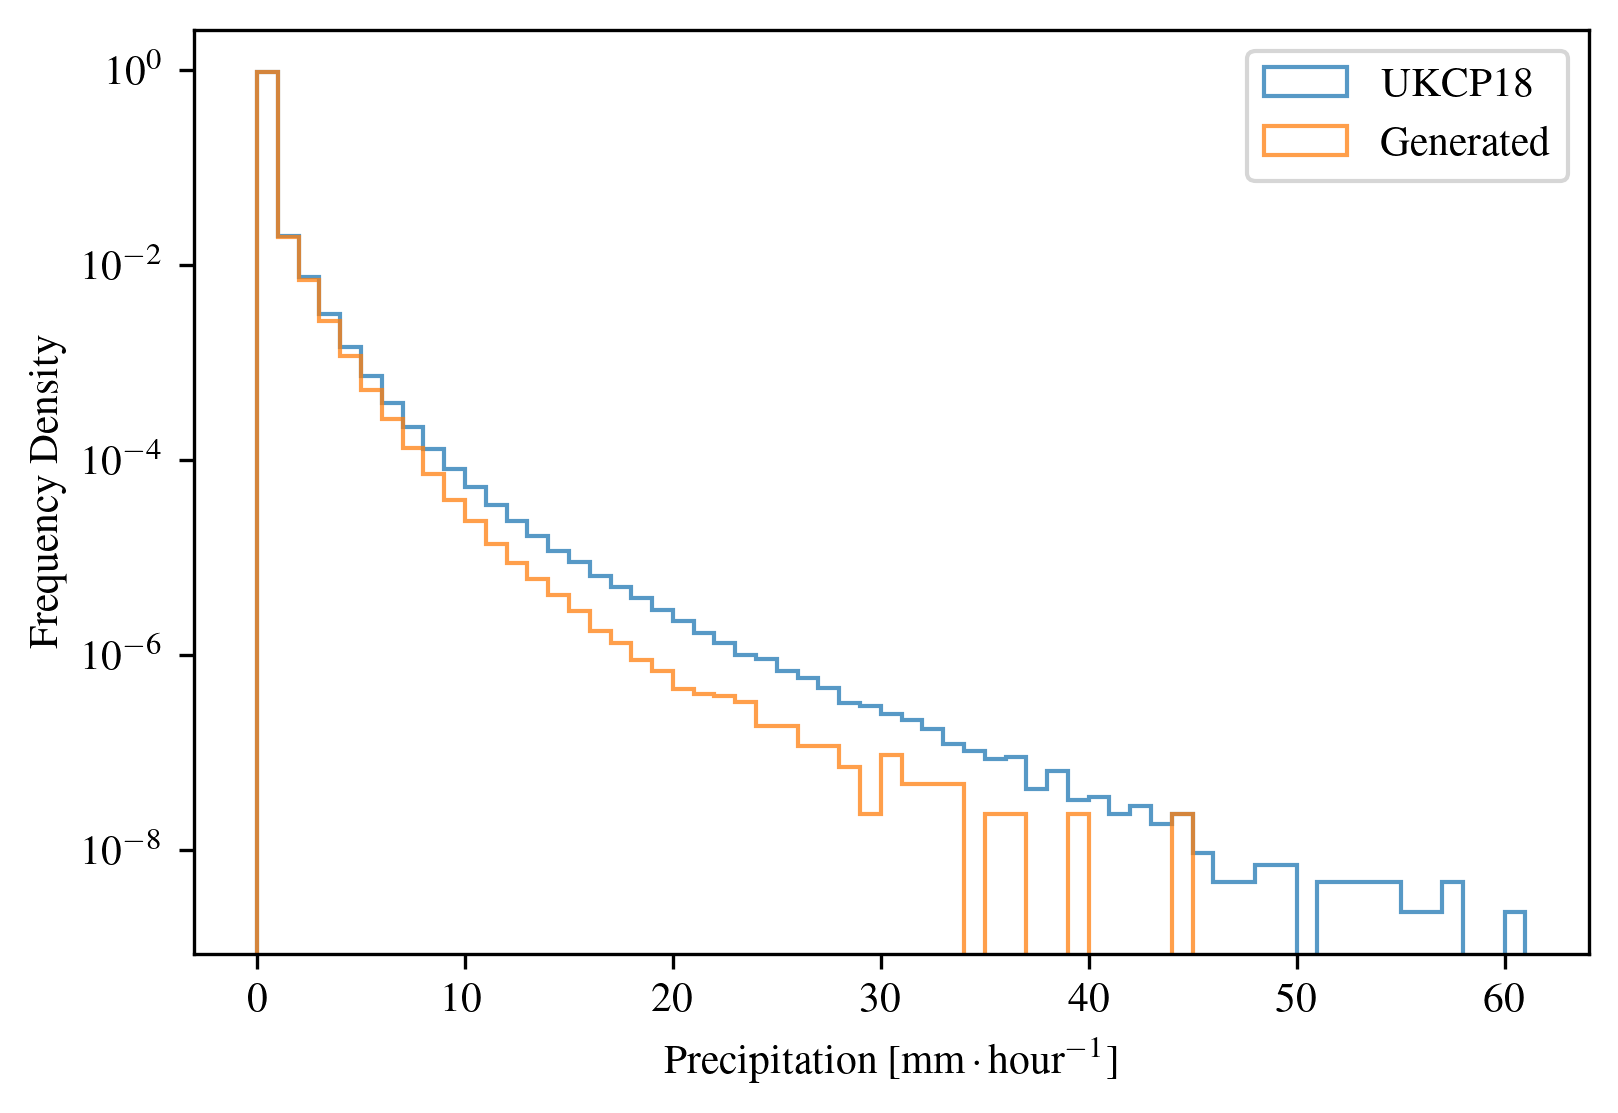

In [18]:
plt.figure(figsize=(6, 4))
max_value = max(test_flattened_sorted.max(), samples_flattened_sorted.max())
max_value_ceil = math.ceil(max_value)
plt.hist(test_flattened_sorted, density = True, range = (0, max_value_ceil), bins = max_value_ceil, alpha = 0.75, histtype = "step", label = "UKCP18")
plt.hist(samples_flattened_sorted, density = True, range = (0, max_value_ceil), bins = max_value_ceil, alpha = 0.75, histtype = "step", label = "Generated")
plt.yscale("log")
plt.xlabel('Precipitation [$\mathrm{mm}\cdot\mathrm{hour}^{-1}$]')
plt.ylabel('Frequency Density')
plt.legend()
plt.show()